In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Checking the missing values if exist

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

so we found that, age and deck have missing values

Method 1: Drop rows, where values are missing.

In [4]:
df_drop_row = df.dropna()
df_drop_row.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Now we are goning to compare how much data we have lost

In [5]:
df_drop_row.shape, df.shape

((182, 15), (891, 15))

Method 2: Dont drop entire row, just drop the column where we have missing values.

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
drop_col = df.dropna(axis = 1)
drop_col.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

Now compare after dropping columns

In [8]:
drop_col.shape, df.shape

((891, 11), (891, 15))

So using above we are losing lots of data. 
if you have huge data then you can go for it.

Method 3: Fill with mean value

Mean works well when it is normal distribution

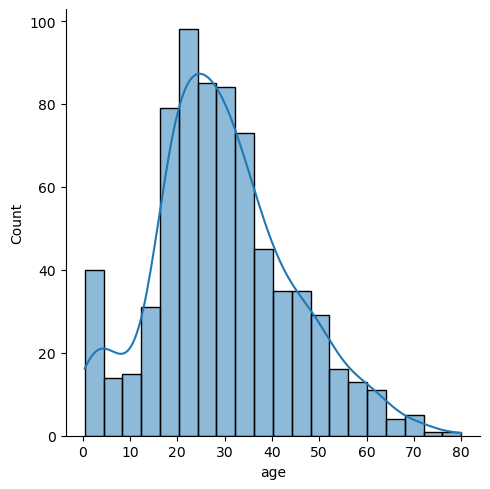

In [13]:
sns.displot(df['age'], kde=True)

In [12]:
df['age_mean'] = df['age'].fillna(df['age'].mean())
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
dtype: int64

Method 4: Use Median

if the distribution is left/right skewed then use median.

In [14]:
df['age_meadian'] = df['age'].fillna(df['age'].median())
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_meadian      0
dtype: int64

Method 5: For Categorical Values

Use mode for catgorical value

Let see which values are missing

In [21]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_meadian
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


Find the mode

In [23]:
df['embarked'].unique(), df['embarked'].mode()

(array(['S', 'C', 'Q', nan], dtype=object),
 0    S
 Name: embarked, dtype: object)

In [25]:
df['embarked'].mode()[0]

'S'

In [26]:
df['embark_mode'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_meadian      0
embark_mode      0
dtype: int64

In [28]:
df[['embarked', 'embark_mode']]

,embarked,embark_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


Checking only null values

In [29]:
df[df['embarked'].isnull()][['embarked', 'embark_mode']]

,embarked,embark_mode
61,NaN,S
829,NaN,S


Method 6: Using random value

while putting the missing value then just pick a random value and insert it

In [30]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_meadian      0
embark_mode      0
dtype: int64

In [33]:
# only taking age coluumn
df_age = df['age'].dropna()
df_age # No missing values here

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [34]:
import numpy as np
df['age_random'] = df['age'].apply(lambda x: np.random.choice(df_age) if pd.isnull(x) else x)

In [35]:
df.age_random.isnull().sum()

np.int64(0)

In [36]:
df[df.age.isnull()][['age', 'age_random']]

,age,age_random
5,NaN,10.00
17,NaN,51.00
19,NaN,0.83
26,NaN,30.00
28,NaN,41.00
...,...,...
859,NaN,6.00
863,NaN,28.50
868,NaN,22.00
878,NaN,44.00
